In [1]:
import time
import pandas as pd
import numpy as np
import math

In [2]:
import scipy.io as sio
matlabData = sio.loadmat('ex3data1.mat')
X = matlabData['X']
y = matlabData['y']


input_layer = 400
num_labels = 10

Part 1: Loading and Visualizing Data

In [3]:
m,n = np.shape(X)
y = y.reshape(m)
nb_rows_to_select = 100
idx = np.random.permutation(m)[:nb_rows_to_select]
sel = X[idx,:]

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [5]:
def display_data(X: np.array) -> None:
    m,n = np.shape(X)
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    plt.subplot(display_rows,display_cols,1)
    for i in range(display_rows):
        for j in range(display_cols):
            plt.subplot(display_rows,display_cols,i*display_cols+j+1)
            temp_digit_image = sel[i*display_cols+j,:].reshape(20,20).T
            plt.imshow(temp_digit_image, cmap= matplotlib.cm.binary, interpolation='nearest')
            plt.axis('off')      
    plt.show()

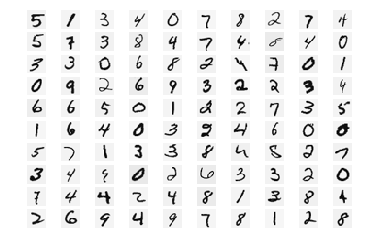

In [6]:
display_data(sel)

Part 2a: Vectorize Logistic Regression

In [7]:
def sigmoid(x: np.array) -> np.array:
    return 1/(1+np.exp(-x))
def costFunctionReg(theta: np.array, X: np.array, y: np.array, lambda_: float) -> (float, np.array):
    m = len(y)
    h = sigmoid(X.dot(theta))
    log_h = np.log(h)
    log_1_h = np.log(1-h)
    theta_bis = np.copy(theta)
    theta_bis[0] = 0
    J = 1/m *(-y.T.dot(log_h) - (1-y).T.dot(log_1_h)) + lambda_/(2*m)*theta_bis.T.dot(theta_bis)
    grad = 1/m * X.T.dot(h - y) + lambda_/m*theta_bis
    return J, grad

def costOnlyReg(theta: np.array, X: np.array, y: np.array, lambda_: float) -> float:
    m = len(y)
    h = sigmoid(X.dot(theta))
    log_h = np.log(h)
    log_1_h = np.log(1-h)
    theta_bis = np.copy(theta)
    theta_bis[0] = 0
    J = 1/m *(-y.T.dot(log_h) - (1-y).T.dot(log_1_h)) + lambda_/(2*m)*theta_bis.T.dot(theta_bis)
    return J

def gradientOnlyReg(theta: np.array, X: np.array, y: np.array, lambda_: float) ->  np.array:
    m = len(y)
    h = sigmoid(X.dot(theta))
    log_h = np.log(h)
    log_1_h = np.log(1-h)
    theta_bis = np.copy(theta)
    theta_bis[0] = 0
    grad = 1/m * X.T.dot(h - y) + lambda_/m*theta_bis
    return grad

In [11]:
import scipy.optimize as op
def oneVsAll(X: np.array, y: np.array, lambda_: float)-> np.array:
    values = np.unique(y)
    values.sort()
    nb_values = np.shape(values)[0]
    m,n = np.shape(X)
    all_theta = np.zeros((nb_values,n + 1))
    initial_theta = np.zeros(n+1)
    X_with_ones = np.c_[np.ones(m),X]
    for i in range(nb_values):
        y_i = np.int32(y == values[i])
        min_theta = op.minimize(fun = costOnlyReg,x0 = initial_theta, args = (X_with_ones, y_i,lambda_), method = 'TNC', jac = gradientOnlyReg)
        all_theta[i,:] = min_theta.x
    return all_theta
        

In [9]:
#Testing costFunction() with regularization'

theta_t = np.array([-2, -1, 1, 2])
X_t = np.c_[np.ones(5), np.array([i+1 for i in range(15)]).reshape((3,5)).T/10]
y_t = (np.array([1,0,1,0,1]) >= 0.5)
lambda_t = 3
J,grad = costFunctionReg(theta_t, X_t, y_t, lambda_t)


print('Cost: {}'.format( J))
print('Expected cost: 2.534819\n')
print('Gradients:\n')
print(grad)
print('Expected gradients:\n')
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n')


Cost: 2.534819396109744
Expected cost: 2.534819

Gradients:

[ 0.14656137 -0.54855841  0.72472227  1.39800296]
Expected gradients:

 0.146561
 -0.548558
 0.724722
 1.398003



Part 2b: One-vs-All Training

In [13]:
lambda_ = 0.1
all_theta = oneVsAll(X, y,lambda_)

Part 3: Predict for One-Vs-All

In [18]:
def predictOneVsAll(all_theta: np.array, X: np.array, y: np.array) -> np.array:
    values = np.unique(y)
    values.sort()
    X_with_ones = np.c_[np.ones(m),X]
    idx = np.argmax(X_with_ones.dot(all_theta.T),axis=1)
    return values[idx]

In [23]:
pred = predictOneVsAll(all_theta, X, y)
print('\nTraining Set Accuracy: {:.3f}'.format(np.mean(np.float32(pred == y)) * 100))



Training Set Accuracy: 96.460
